In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/GT_ML_Project_1


In [17]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_deskew
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from tqdm import tqdm
sns.set()

In [3]:
%run __init__.py

In [4]:
%run src/load_data.py

In [5]:
adt_data = data['adult']['train']['engineered']
adt_lbls = data['adult']['train']['labels']
mad_data = data['madelon']['train']['raw_data']
mad_lbls = data['madelon']['train']['labels']

In [6]:
cls = pipeline_deskew(MLPClassifier)

In [7]:
cls.named_steps

{'functiontransformer': FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
           inverse_func=None, kw_args=None, pass_y='deprecated',
           validate=True),
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(10, 11)),
 'mlpclassifier': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [8]:
param_grid = { 
    'mlpclassifier__hidden_layer_sizes' : [(64,), (32,), (16,16,), (16,16,16),(16,16,16,16)],
    'mlpclassifier__alpha' : np.logspace(-2,2,5)
}

# Madelon

In [9]:
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1, scoring='f1', cv=StratifiedKFold(), verbose=2)
gs_madelon.fit(mad_data, mad_lbls)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=   4.8s
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01, total=   4.8s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=   4.9s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=   5.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=0.0

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.5s


[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=1.0, total=   7.2s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=1.0, total=   6.4s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=1.0, total=   6.3s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=   7.0s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=   6.4s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=   7.2s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0, total=   8.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0, total=   7.9s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0, total=   7.9s
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=10.0 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=10.0, total=   3.0s
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=10.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0, total=   8.3s
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=10.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0, total=   7.8s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=10.0 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=10.0, total=   3.7s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=10.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0, total=   9.1s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=10.0

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=   5.6s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=   6.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=   5.4s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=   6.2s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=   5.8s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=   6.3s


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   7.8s
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   7.1s


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   5.4s


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(10, 11))), ('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('standardscaler', StandardScale...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(64,), (32,), (16, 16), (16, 16, 16), (16, 16, 16, 16)], 'mlpclassifier__alpha': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=2)

In [10]:
mad_results = pd.DataFrame(gs_madelon.cv_results_)

In [11]:
mad_results.to_pickle("results/MLP_GS_madelon.p")

# Adult 

In [12]:
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1, scoring='f1', cv=StratifiedKFold(), verbose=2)
gs_adult.fit(adt_data, adt_lbls)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01 
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01, total=  16.4s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=  21.4s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=  26.2s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=0.01, total=  28.4s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=0.0

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min


[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=1.0, total=   9.5s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=1.0, total=   7.7s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=1.0, total=   8.4s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=  11.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=  11.2s
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=1.0, total=  11.5s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=1.0 
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=1.0 

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=100.0, total=   9.7s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=100.0, total=   8.3s
[CV] mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=100.0, total=   5.5s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(64,), mlpclassifier__alpha=100.0, total=   9.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=100.0, total=   9.3s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(32,), mlpclassifier__alpha=100.0, total=   9.0s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=   5.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=  12.5s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16), mlpclassifier__alpha=100.0, total=   9.5s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=  11.1s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   7.3s
[CV] mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0 


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=   9.7s


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16), mlpclassifier__alpha=100.0, total=  11.2s


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   6.0s
[CV]  mlpclassifier__hidden_layer_sizes=(16, 16, 16, 16), mlpclassifier__alpha=100.0, total=   7.7s


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(10, 11))), ('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('standardscaler', StandardScale...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(64,), (32,), (16, 16), (16, 16, 16), (16, 16, 16, 16)], 'mlpclassifier__alpha': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=2)

In [13]:
adult_results = pd.DataFrame(gs_adult.cv_results_)
adult_results.to_pickle("results/MLP_GS_adult.p")

In [1]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,2,1)
nn_1_mask = mad_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(64,)'
nn_2_mask = mad_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(32,)'
nn_3_mask = mad_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16)'
nn_4_mask = mad_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16, 16)'
nn_5_mask = mad_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16, 16, 16)'

plt.plot(mad_results[nn_1_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_1_mask]['mean_test_score'], label="64")
plt.plot(mad_results[nn_2_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_2_mask]['mean_test_score'], label="32")
plt.plot(mad_results[nn_3_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_3_mask]['mean_test_score'], label="16x2")
plt.plot(mad_results[nn_4_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_4_mask]['mean_test_score'], label="16x3")
plt.plot(mad_results[nn_5_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_5_mask]['mean_test_score'], label="16x4")

plt.legend()
plt.xscale('log')
plt.ylim(0,0.85)
plt.title("Madelon")


fig.add_subplot(1,2,2)

nn_1_mask = adult_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(64,)'
nn_2_mask = adult_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(32,)'
nn_3_mask = adult_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16)'
nn_4_mask = adult_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16, 16)'
nn_5_mask = adult_results['param_mlpclassifier__hidden_layer_sizes'].astype(str) == '(16, 16, 16, 16)'

plt.plot(adult_results[nn_1_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_1_mask]['mean_test_score'], label="64")
plt.plot(adult_results[nn_2_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_2_mask]['mean_test_score'], label="32")
plt.plot(adult_results[nn_3_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_3_mask]['mean_test_score'], label="16x2")
plt.plot(adult_results[nn_4_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_4_mask]['mean_test_score'], label="16x3")
plt.plot(adult_results[nn_5_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_5_mask]['mean_test_score'], label="16x4")

plt.legend()
plt.xscale('log')
plt.ylim(0.15,0.85)
plt.title("Adult")


NameError: name 'plt' is not defined

In [21]:
gs_madelon.best_params_

{'mlpclassifier__alpha': 10.0, 'mlpclassifier__hidden_layer_sizes': (16, 16)}

In [20]:
gs_adult.best_params_

{'mlpclassifier__alpha': 1.0,
 'mlpclassifier__hidden_layer_sizes': (16, 16, 16, 16)}

In [51]:
mad_results = pd.read_pickle("results/MLP_GS_madelon.p")
adult_results = pd.read_pickle("results/MLP_GS_adult.p")

Text(0.5,1,'Adult')

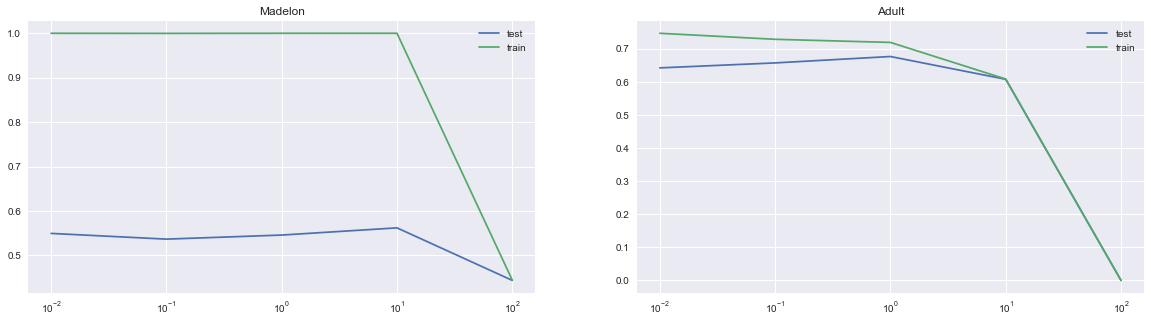

In [52]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)

plt.plot(mad_results[nn_3_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_3_mask]['mean_test_score'], label="test")
plt.plot(mad_results[nn_3_mask]['param_mlpclassifier__alpha'],
         mad_results[nn_3_mask]['mean_train_score'], label="train")

plt.legend()
plt.xscale('log')
plt.title("Madelon")


fig.add_subplot(1,2,2)
plt.plot(adult_results[nn_5_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_5_mask]['mean_test_score'], label="test")
plt.plot(adult_results[nn_5_mask]['param_mlpclassifier__alpha'],
         adult_results[nn_5_mask]['mean_train_score'], label="train")

plt.legend()
plt.xscale('log')
plt.title("Adult")

# These graphs are actual REVERSE complexity 
because as we increase alpha we increase the regularization, which means that they will be more biased. Less Variance.  We should flip the X axis to follow convention.

In [24]:
cls.named_steps

{'functiontransformer': FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
           inverse_func=None, kw_args=None, pass_y='deprecated',
           validate=True),
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(10, 11)),
 'mlpclassifier': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [25]:
range(0,500)

range(0, 500)

In [31]:
param_grid = { 
    'mlpclassifier__hidden_layer_sizes' : [(16,16,)],
    'mlpclassifier__max_iter' : list(range(1,501))
}

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

In [35]:
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1, scoring='f1', cv=StratifiedShuffleSplit(n_splits=1, test_size = .2), verbose=1)
gs_madelon.fit(mad_data, mad_lbls)

Fitting 1 folds for each of 500 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=None, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(10, 11))), ('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('standardscaler', StandardScale...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(16, 16)], 'mlpclassifier__max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, ...481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 49

In [36]:
gs_madelon.best_params_

{'mlpclassifier__hidden_layer_sizes': (16, 16), 'mlpclassifier__max_iter': 6}

In [37]:
gs_madelon.best_score_

0.63063063063063063

In [38]:
mad_results = pd.DataFrame(gs_madelon.cv_results_)
mad_results.to_pickle("results/MLP_500iter_GS_madelon.p")

In [ ]:
# You need to load back that pickle, your gs_madelon is screwed.

In [41]:
mad_results = pd.read_pickle("results/MLP_500iter_GS_madelon.p")

In [40]:
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1, scoring='f1', cv=StratifiedShuffleSplit(n_splits=1, test_size = .2), verbose=1)
gs_adult.fit(adt_data, adt_lbls)

Fitting 1 folds for each of 500 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 34.4min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=None, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(10, 11))), ('functiontransformer', FunctionTransformer(accept_sparse=False, func=<ufunc 'log'>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('standardscaler', StandardScale...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(16, 16)], 'mlpclassifier__max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, ...481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 49

In [42]:
print(gs_adult.best_params_)
print(gs_adult.best_score_)

{'mlpclassifier__hidden_layer_sizes': (16, 16), 'mlpclassifier__max_iter': 453}
0.684188569045


In [43]:
adult_results = pd.DataFrame(gs_adult.cv_results_)
adult_results.to_pickle("results/MLP_500iter_GS_adult.p")

Text(0.5,1,'Adult')

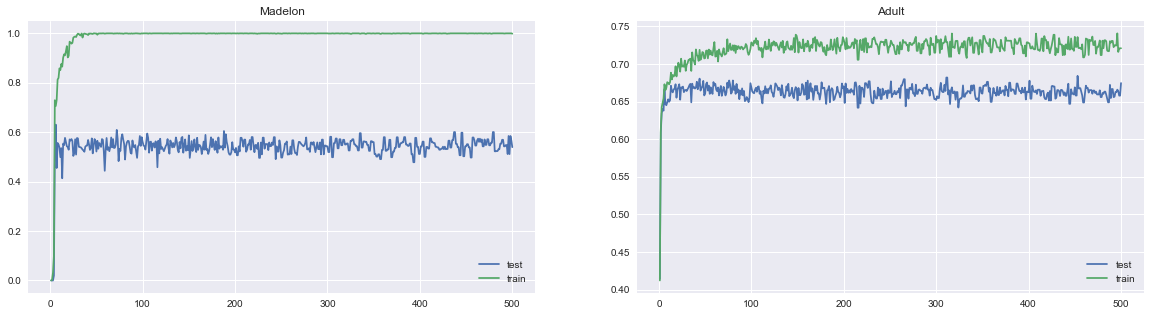

In [48]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)

plt.plot(mad_results['param_mlpclassifier__max_iter'],
         mad_results['mean_test_score'], label="test")
plt.plot(mad_results['param_mlpclassifier__max_iter'],
         mad_results['mean_train_score'], label="train")
plt.legend()

plt.title("Madelon")


fig.add_subplot(1,2,2)
plt.plot(adult_results['param_mlpclassifier__max_iter'],
         adult_results['mean_test_score'], label="test")
plt.plot(adult_results['param_mlpclassifier__max_iter'],
         adult_results['mean_train_score'], label="train")

plt.legend()
plt.title("Adult")

Text(0.5,1,'Adult')

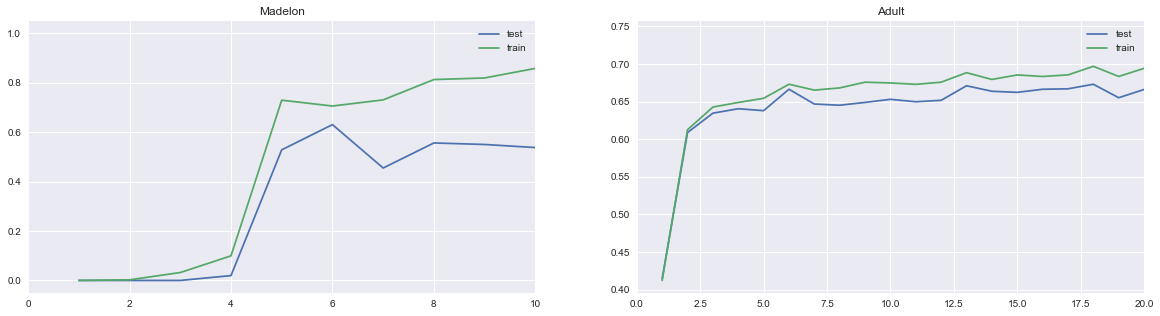

In [49]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)

plt.plot(mad_results['param_mlpclassifier__max_iter'],
         mad_results['mean_test_score'], label="test")
plt.plot(mad_results['param_mlpclassifier__max_iter'],
         mad_results['mean_train_score'], label="train")
plt.xlim(0,10)
plt.legend()

plt.title("Madelon")


fig.add_subplot(1,2,2)
plt.plot(adult_results['param_mlpclassifier__max_iter'],
         adult_results['mean_test_score'], label="test")
plt.plot(adult_results['param_mlpclassifier__max_iter'],
         adult_results['mean_train_score'], label="train")

plt.legend()
plt.xlim(0,20)
plt.title("Adult")